In [1]:
 # 1. Loading and Preprocessing

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# View the first few rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# 2.Clustering Algorithm Implementation

In [4]:
# A. KMeans Clustering

KMeans is an unsupervised learning algorithm that partitions data into K distinct clusters based on similarity. It works by:

1.Randomly selecting K centroids.

2. Assigning each point to the nearest centroid.

3.Updating the centroids by calculating the mean of points in each cluster.

4.Repeating the process until centroids stabilize or a max number of iterations is reached.

Why KMeans for Iris?

1.Iris dataset has natural groupings (3 species).

2.It’s numerical and well-suited for centroid-based clustering.

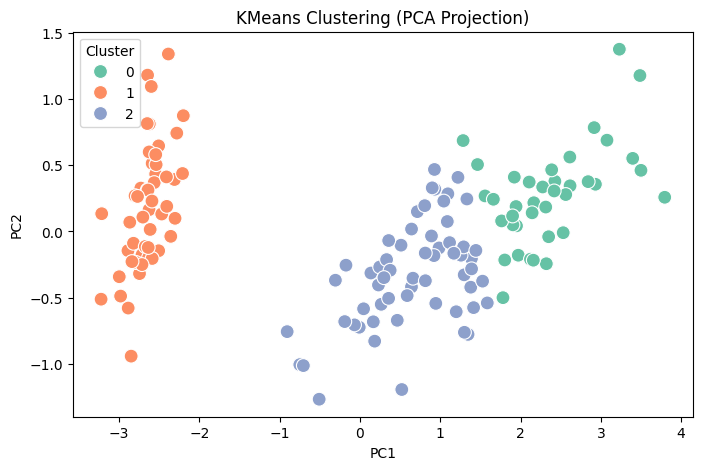

In [5]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(df)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df.drop('kmeans_cluster', axis=1)), columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['kmeans_cluster']

# Visualize clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=100)
plt.title("KMeans Clustering (PCA Projection)")
plt.show()

In [6]:
# B. Hierarchical Clustering

Hierarchical clustering builds a tree-like structure (dendrogram) of clusters:

1.Agglomerative (bottom-up): each point starts as its own cluster and merges with others.

2.Based on distance metrics (e.g., Euclidean) and linkage criteria (e.g., Ward’s method).

Why Hierarchical for Iris?

1. Doesn’t require predefining the number of clusters.

2. Useful to visualize data hierarchy and relationships.

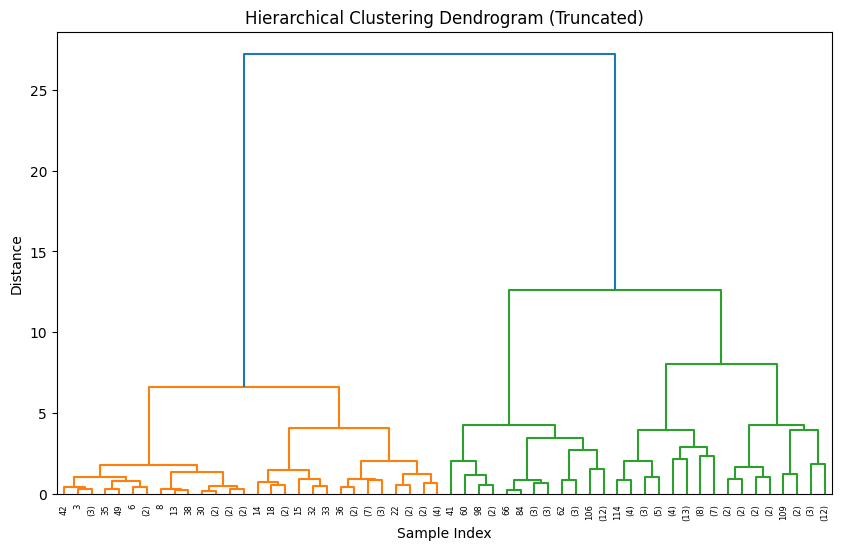

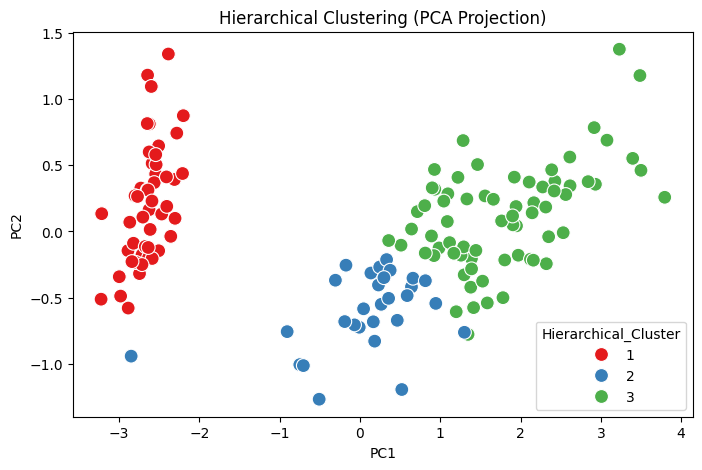

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

# Standardize data for better hierarchical clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('kmeans_cluster', axis=1))

# Compute linkage matrix
linked = linkage(df_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram (Truncated)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Assign cluster labels
df['hierarchical_cluster'] = fcluster(linked, 3, criterion='maxclust')

# Visualize clusters
df_pca['Hierarchical_Cluster'] = df['hierarchical_cluster']
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Hierarchical_Cluster', palette='Set1', s=100)
plt.title("Hierarchical Clustering (PCA Projection)")
plt.show()